# INEP Data Extraction

by: [@mascalmeida](https://github.com/mascalmeida)

In [1]:
# Packages
import pandas as pd
import zipfile
import requests
from io import BytesIO
import os
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

## ENADE 2019

### 1. EXTRACTION DATA

In [2]:
# Get access from ENADE and extract data

## Create data directory
os.makedirs('./enade2019', exist_ok=True)

## Data link
url = 'https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2019.zip'

## Content download
filebytes = BytesIO(
    requests.get(url).content
)

## Extract the content from zip file
myzip = zipfile.ZipFile(filebytes)
myzip.extractall('./enade2019')

In [3]:
# Import data from local directory
enade = pd.read_csv(
    './enade2019/3.DADOS/microdados_enade_2019.txt', 
    sep=';', 
    decimal=',', 
    low_memory=False)
## Show data
display(enade.head())

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2019,1,10002,10028,5710,3,1,5103403,51,5,...,2,5,1,1,2,5,8,7,1,2
1,2019,1,10002,10028,5710,3,1,5103403,51,5,...,1,4,2,2,2,5,4,4,2,2
2,2019,1,10002,10028,5710,3,1,5103403,51,5,...,3,4,4,3,3,4,1,1,1,4
3,2019,1,10002,10028,5710,3,1,5103403,51,5,...,3,5,2,2,2,3,3,4,3,3
4,2019,1,10002,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Basic informations
## Data info
print(enade.info(), '\n')
## Column types
print(dict(enade.dtypes))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433930 entries, 0 to 433929
Columns: 137 entries, NU_ANO to QE_I68
dtypes: float64(2), int64(33), object(102)
memory usage: 453.6+ MB
None 

{'NU_ANO': dtype('int64'), 'CO_IES': dtype('int64'), 'CO_CATEGAD': dtype('int64'), 'CO_ORGACAD': dtype('int64'), 'CO_GRUPO': dtype('int64'), 'CO_CURSO': dtype('int64'), 'CO_MODALIDADE': dtype('int64'), 'CO_MUNIC_CURSO': dtype('int64'), 'CO_UF_CURSO': dtype('int64'), 'CO_REGIAO_CURSO': dtype('int64'), 'NU_IDADE': dtype('int64'), 'TP_SEXO': dtype('O'), 'ANO_FIM_EM': dtype('int64'), 'ANO_IN_GRAD': dtype('float64'), 'CO_TURNO_GRADUACAO': dtype('float64'), 'TP_INSCRICAO_ADM': dtype('int64'), 'TP_INSCRICAO': dtype('int64'), 'NU_ITEM_OFG': dtype('int64'), 'NU_ITEM_OFG_Z': dtype('int64'), 'NU_ITEM_OFG_X': dtype('int64'), 'NU_ITEM_OFG_N': dtype('int64'), 'NU_ITEM_OCE': dtype('int64'), 'NU_ITEM_OCE_Z': dtype('int64'), 'NU_ITEM_OCE_X': dtype('int64'), 'NU_ITEM_OCE_N': dtype('int64'), 'DS_VT_GAB_OFG_ORIG': dty

# THE EXTRACTION CODE ENDS HERE
OBS: The code below is just an example to show how we can use this data

*Question - How was the automation engineering performance?*
### 2. TRANSFORM DATA
Important informations (get from variable dictionary -> 1.LEIA-ME):
- CO_GRUPO 5814 = ENGENHARIA DE CONTROLE E AUTOMAÇÃO
- CO_CURSO =  Código do curso no ENADE
- CO_MUNIC_CURSO =  Código do município de funcionamento do curso
- CO_UF_CURSO = Código da UF de funcionamento do curso
- CO_REGIAO_CURSO = Código da região de funcionamento do curso
- NT_GER = Nota bruta da prova (25% formação geral + 75% componente específico)
- NT_FG = Nota bruta formação geral
- NT_CE = Nota bruta componente específico

In [5]:
## Filter and select data
enade_automation = enade.loc[enade['CO_GRUPO'] == 5814, ['CO_GRUPO', 'CO_CURSO', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO', 'NT_GER', 'NT_FG', 'NT_CE']]
display(enade_automation.head())
print(dict(enade_automation.dtypes))

,CO_GRUPO,CO_CURSO,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NT_GER,NT_FG,NT_CE
9204,5814,1925,4314902,43,4,"64,3","55,4","67,2"
9205,5814,1925,4314902,43,4,"50,2","55,1","48,5"
9206,5814,1925,4314902,43,4,"29,8","34,3","28,3"
9207,5814,1925,4314902,43,4,"45,3","68,6","37,5"
9208,5814,1925,4314902,43,4,"50,5","56,4","48,5"


{'CO_GRUPO': dtype('int64'), 'CO_CURSO': dtype('int64'), 'CO_MUNIC_CURSO': dtype('int64'), 'CO_UF_CURSO': dtype('int64'), 'CO_REGIAO_CURSO': dtype('int64'), 'NT_GER': dtype('O'), 'NT_FG': dtype('O'), 'NT_CE': dtype('O')}


In [6]:
# Define variable types
enade_automation['NT_GER'] = enade_automation['NT_GER'].str.replace(',', '.').astype(float)
enade_automation['NT_FG'] = enade_automation['NT_FG'].str.replace(',', '.').astype(float)
enade_automation['NT_CE'] = enade_automation['NT_CE'].str.replace(',', '.').astype(float)
display(enade_automation.head())
print(dict(enade_automation.dtypes))

,CO_GRUPO,CO_CURSO,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NT_GER,NT_FG,NT_CE
9204,5814,1925,4314902,43,4,64.3,55.4,67.2
9205,5814,1925,4314902,43,4,50.2,55.1,48.5
9206,5814,1925,4314902,43,4,29.8,34.3,28.3
9207,5814,1925,4314902,43,4,45.3,68.6,37.5
9208,5814,1925,4314902,43,4,50.5,56.4,48.5


{'CO_GRUPO': dtype('int64'), 'CO_CURSO': dtype('int64'), 'CO_MUNIC_CURSO': dtype('int64'), 'CO_UF_CURSO': dtype('int64'), 'CO_REGIAO_CURSO': dtype('int64'), 'NT_GER': dtype('float64'), 'NT_FG': dtype('float64'), 'NT_CE': dtype('float64')}


In [7]:
# Import auxiliar data
## City code dataset
city_code = pd.read_excel(
    './enade2019/1.LEIA-ME/Dicionário de variáveis dos Microdados do Enade 2019.xlsx', 
    sheet_name='MUNICÍPIOS', 
    skiprows=4, 
    usecols=[1,2,3], 
    header=None,
    names=['CO_MUNIC_CURSO', 'NOME_MUNIC', 'UF'], 
    dtype={'CO_MUNIC_CURSO': int})
display(city_code.head())
print(dict(city_code.dtypes))

,CO_MUNIC_CURSO,NOME_MUNIC,UF
0,1100015,ALTA FLORESTA D´OESTE,RO
1,1100023,ARIQUEMES,RO
2,1100031,CABIXI,RO
3,1100049,CACOAL,RO
4,1100056,CEREJEIRAS,RO


{'CO_MUNIC_CURSO': dtype('int64'), 'NOME_MUNIC': dtype('O'), 'UF': dtype('O')}


In [8]:
# Merge main data with auxiliar dataset
enade_automation = enade_automation.merge(city_code, on='CO_MUNIC_CURSO', how='left')
display(enade_automation.head())

,CO_GRUPO,CO_CURSO,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NT_GER,NT_FG,NT_CE,NOME_MUNIC,UF
0,5814,1925,4314902,43,4,64.3,55.4,67.2,PORTO ALEGRE,RS
1,5814,1925,4314902,43,4,50.2,55.1,48.5,PORTO ALEGRE,RS
2,5814,1925,4314902,43,4,29.8,34.3,28.3,PORTO ALEGRE,RS
3,5814,1925,4314902,43,4,45.3,68.6,37.5,PORTO ALEGRE,RS
4,5814,1925,4314902,43,4,50.5,56.4,48.5,PORTO ALEGRE,RS


Add names correlated to CO_REGIAO_CURSO:
1. Região Norte (NO)
2. Região Nordeste (NE)
3. Região Sudeste (SE)
4. Região Sul (SUL)
5. Região Centro-Oeste (CO)


In [9]:
# Create new variable (tranform from code to name)
## 1 = Norte
enade_automation['NOME_REGIAO'] = 'NO'
## 2 = Nordeste
enade_automation.loc[enade_automation['CO_REGIAO_CURSO'] == 2, 'NOME_REGIAO'] = 'NE'
## 3 = Sudeste
enade_automation.loc[enade_automation['CO_REGIAO_CURSO'] == 3, 'NOME_REGIAO'] = 'SE'
## 4 = Sul
enade_automation.loc[enade_automation['CO_REGIAO_CURSO'] == 4, 'NOME_REGIAO'] = 'SUL'
## 5 = Centro-Oeste
enade_automation.loc[enade_automation['CO_REGIAO_CURSO'] == 5, 'NOME_REGIAO'] = 'CO'
display(enade_automation.head())
print(dict(enade_automation.dtypes))

,CO_GRUPO,CO_CURSO,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NT_GER,NT_FG,NT_CE,NOME_MUNIC,UF,NOME_REGIAO
0,5814,1925,4314902,43,4,64.3,55.4,67.2,PORTO ALEGRE,RS,SUL
1,5814,1925,4314902,43,4,50.2,55.1,48.5,PORTO ALEGRE,RS,SUL
2,5814,1925,4314902,43,4,29.8,34.3,28.3,PORTO ALEGRE,RS,SUL
3,5814,1925,4314902,43,4,45.3,68.6,37.5,PORTO ALEGRE,RS,SUL
4,5814,1925,4314902,43,4,50.5,56.4,48.5,PORTO ALEGRE,RS,SUL


{'CO_GRUPO': dtype('int64'), 'CO_CURSO': dtype('int64'), 'CO_MUNIC_CURSO': dtype('int64'), 'CO_UF_CURSO': dtype('int64'), 'CO_REGIAO_CURSO': dtype('int64'), 'NT_GER': dtype('float64'), 'NT_FG': dtype('float64'), 'NT_CE': dtype('float64'), 'NOME_MUNIC': dtype('O'), 'UF': dtype('O'), 'NOME_REGIAO': dtype('O')}


### 3. DATA ANALYSIS

- Recomendation: [data to viz](https://www.data-to-viz.com/)

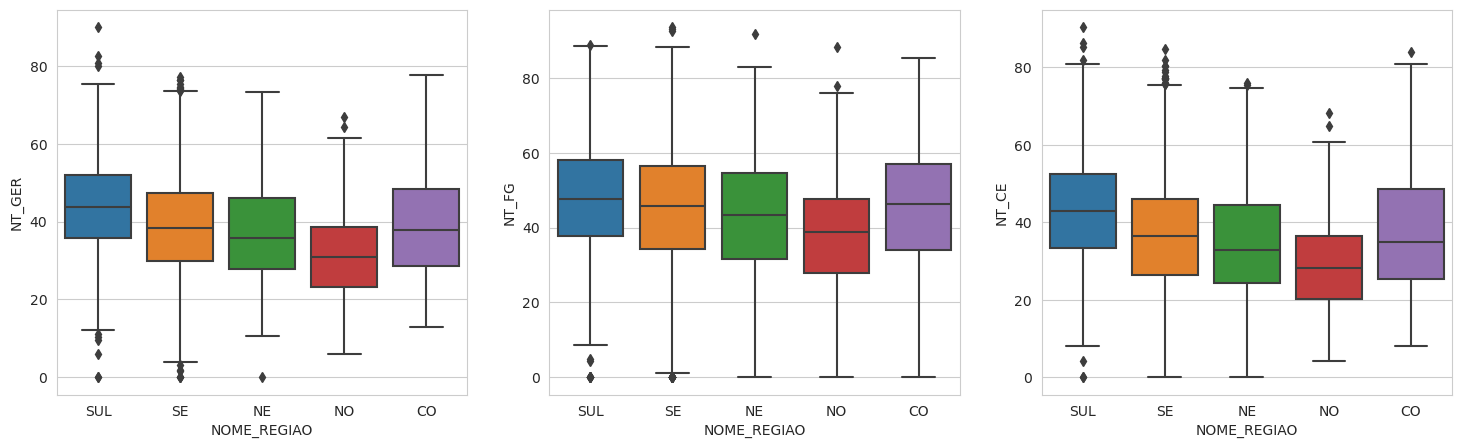

In [20]:
# Focus on regions
## BoxPlot - One numerical variable and several groups
f = plt.figure(figsize=(18, 5))
gs = f.add_gridspec(1, 3)

with sns.axes_style("whitegrid"):

    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x="NOME_REGIAO", y="NT_GER", data=enade_automation)
    x = f.add_subplot(gs[0, 1])
    sns.boxplot(x="NOME_REGIAO", y="NT_FG", data=enade_automation)
    x = f.add_subplot(gs[0, 2])
    sns.boxplot(x="NOME_REGIAO", y="NT_CE", data=enade_automation)

    plt.show()

f.tight_layout()